In [1]:
import pickle
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [2]:
exponents = np.linspace(3, 4, num=10 + 1)
F_values = [int(10 ** x) for x in exponents]
M_values = [m for m in range(1, 10+1)]

In [7]:
with open("../sauron_results_3/truncation_feature_accuracy/trp.pkl", "rb") as f:
    trp_accuracy_measurements = pickle.load(f)

with open("../sauron_results_3/truncation_feature_accuracy/ts.pkl", "rb") as f:
    ts_accuracy_measurements = pickle.load(f)

with open("../sauron_results_3/truncation_feature_accuracy/dp.pkl", "rb") as f:
    dp1_accuracy_measurements = pickle.load(f)

with open("../sauron_results_3/truncation_feature_accuracy/dp2.pkl", "rb") as f:
    dp2_accuracy_measurements = pickle.load(f)

## TRP

In [9]:
accuracy_measurements = trp_accuracy_measurements

rmse_results = []
mape_results = []
for F in F_values:
    rmse_row = []
    mape_row = []
    for M in M_values:
        accuracy = accuracy_measurements[(F, M)]
        if accuracy == None:
            rmse_output = np.nan
            mape_output = np.nan
        else:
            # cpu_peak
            rmse_output = float(accuracy[0])
            # used_bytes
            mape_output = float(accuracy[1])
        rmse_row.append(rmse_output)
        mape_row.append(mape_output)
    rmse_results.append(rmse_row)
    mape_results.append(mape_row)

trp_rmse_df = pd.DataFrame(rmse_results, index=F_values, columns=M_values).round(3)
trp_mape_df = pd.DataFrame(mape_results, index=F_values, columns=M_values).round(3)

## TS

In [10]:
accuracy_measurements = ts_accuracy_measurements

rmse_results = []
mape_results = []
for F in F_values:
    rmse_row = []
    mape_row = []
    for M in M_values:
        accuracy = accuracy_measurements[(F, M)]
        if accuracy == None:
            rmse_output = np.nan
            mape_output = np.nan
        else:
            # cpu_peak
            rmse_output = float(accuracy[0])
            # used_bytes
            mape_output = float(accuracy[1])
        rmse_row.append(rmse_output)
        mape_row.append(mape_output)
    rmse_results.append(rmse_row)
    mape_results.append(mape_row)


ts_rmse_df = pd.DataFrame(rmse_results, index=F_values, columns=M_values).round(3)
ts_mape_df = pd.DataFrame(mape_results, index=F_values, columns=M_values).round(3)

## DP1

In [11]:
accuracy_measurements = dp1_accuracy_measurements

rmse_results = []
mape_results = []
for F in F_values:
    rmse_row = []
    mape_row = []
    for M in M_values:
        accuracy = accuracy_measurements[(F, M)]
        if accuracy == None:
            rmse_output = np.nan
            mape_output = np.nan
        else:
            # cpu_peak
            rmse_output = float(accuracy[0])
            # used_bytes
            mape_output = float(accuracy[1])
        rmse_row.append(rmse_output)
        mape_row.append(mape_output)
    rmse_results.append(rmse_row)
    mape_results.append(mape_row)

dp1_rmse_df = pd.DataFrame(rmse_results, index=F_values, columns=M_values).round(3)
dp1_mape_df = pd.DataFrame(mape_results, index=F_values, columns=M_values).round(3)

## DP2

In [12]:
accuracy_measurements = dp2_accuracy_measurements

rmse_results = []
mape_results = []
for F in F_values:
    rmse_row = []
    mape_row = []
    for M in M_values:
        accuracy = accuracy_measurements[(F, M)]
        if accuracy == None:
            rmse_output = np.nan
            mape_output = np.nan
        else:
            # cpu_peak
            rmse_output = float(accuracy[0])
            # used_bytes
            mape_output = float(accuracy[1])
        rmse_row.append(rmse_output)
        mape_row.append(mape_output)
    rmse_results.append(rmse_row)
    mape_results.append(mape_row)

dp2_rmse_df = pd.DataFrame(rmse_results, index=F_values, columns=M_values).round(3)
dp2_mape_df = pd.DataFrame(mape_results, index=F_values, columns=M_values).round(3)

## Figures

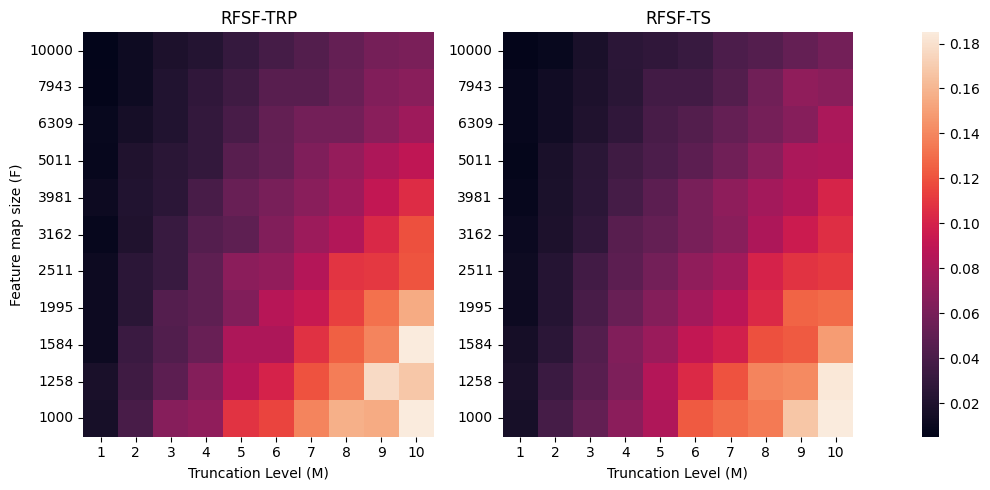

In [14]:
fig, ax = plt.subplots(ncols=3, figsize=(10, 5), sharey=False, gridspec_kw=dict(width_ratios=[1,1,0.05]))

vmin = min(trp_mape_df.values.min(), ts_mape_df.values.min())
vmax = min(trp_mape_df.values.max(), ts_mape_df.values.max())

ax_ = ax[0]
sns.heatmap(trp_mape_df, ax=ax_, vmin=vmin, vmax=vmax, cbar=False)
ax_.set_title("RFSF-TRP")
ax_.set_ylabel("Feature map size (F)")
ax_.set_xlabel("Truncation Level (M)")
ax_.set_ylim(ax_.get_ylim()[::-1])

ax_ = ax[1]
sns.heatmap(ts_mape_df, ax=ax_, vmin=vmin, vmax=vmax, cbar=False)
ax_.set_title("RFSF-TS")
# ax_.set_ylabel("RFF n_components (D)")
ax_.set_xlabel("Truncation Level (M)")
ax_.set_ylim(ax_.get_ylim()[::-1])

# Add the colorbar to the separate axis
cbar = fig.colorbar(ax[1].collections[0], cax=ax[2])
cbar.outline.set_visible(False)

plt.tight_layout()

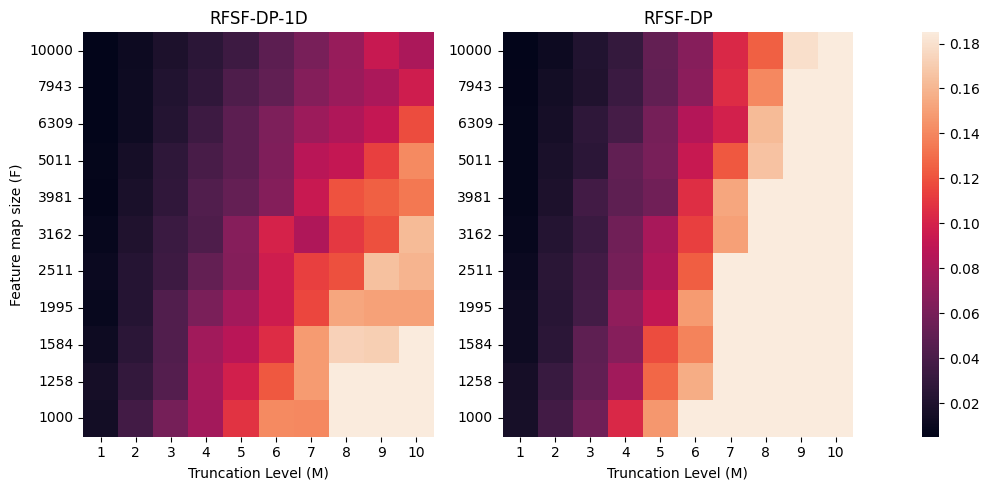

In [15]:
fig, ax = plt.subplots(ncols=3, figsize=(10, 5), sharey=False, gridspec_kw=dict(width_ratios=[1,1,0.05]))

vmin = min(trp_mape_df.values.min(), ts_mape_df.values.min())
vmax = min(trp_mape_df.values.max(), ts_mape_df.values.max())

ax_ = ax[0]
sns.heatmap(dp1_mape_df, ax=ax_, vmin=vmin, vmax=vmax, cbar=False)
ax_.set_title("RFSF-DP-1D")
ax_.set_ylabel("Feature map size (F)")
ax_.set_xlabel("Truncation Level (M)")
ax_.set_ylim(ax_.get_ylim()[::-1])

ax_ = ax[1]
sns.heatmap(dp2_mape_df, ax=ax_, vmin=vmin, vmax=vmax, cbar=False)
ax_.set_title("RFSF-DP")
# ax_.set_ylabel("RFF n_components (D)")
ax_.set_xlabel("Truncation Level (M)")
ax_.set_ylim(ax_.get_ylim()[::-1])

# Add the colorbar to the separate axis
cbar = fig.colorbar(ax[1].collections[0], cax=ax[2])
cbar.outline.set_visible(False)

plt.tight_layout()